In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time as t
import re
from sklearn import datasets, linear_model
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
#import stations with isUrban flag for selected cols
cols = ['Station ID','Station Name', 'Latitude','Longitude','Elevation (m)', 'isUrban' ]
df_stations = pd.read_csv('Dades/OUTPUT XX Filtered Stations Urban-No Urban.csv', skipinitialspace = True, usecols = cols)

In [3]:
#import dades normalitzades
df = pd.read_csv('Dades/OUTPUT 04 Dades Normalitzades.csv')

In [4]:
#merge data with urban information
df_urban = pd.merge(df,df_stations,how='inner',  on ='Station ID')

In [6]:
df_station_byyear = df_urban.pivot_table(index='Year',columns=['Station ID'],values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

In [7]:
Barcelona_Stations = []
for stations in df_stations['Station ID']:
    if re.search('BARCELONA.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        Barcelona_Stations.append(stations)
print Barcelona_Stations

[285, 22888, 22889, 22890]


In [8]:
#DataFrame with Barcelona Stations

not_Barcelona_Stations = []
for stations in df_stations['Station ID']:
    if not re.search('BARCELONA.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        not_Barcelona_Stations.append(stations)

df_Barcelona_stations = df_stations
for notbcnstations in not_Barcelona_Stations:
        df_Barcelona_stations  = df_Barcelona_stations[df_Barcelona_stations['Station ID'] != notbcnstations]
        
print df_Barcelona_stations

    Station ID                              Station Name  Latitude  Longitude  \
1          285  BARCELONA AP EL PRATc                     41.29167     2.0750   
22       22888  BARCELONA                                 41.40000     2.2000   
23       22889  BARCELONA CITY                            41.41700     2.1500   
24       22890  BARCELONA                                 41.41920     2.1253   

    Elevation (m)  isUrban  
1           1.600        1  
22         93.775        1  
23        178.000        1  
24        412.000        1  


In [11]:
#merge data with urban information
df_Barcelona = pd.merge(df_Barcelona_stations,df,how='inner',  on ='Station ID')

In [9]:
Madrid_Stations = []
for stations in df_stations['Station ID']:
    if re.search('MADRID.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        Madrid_Stations.append(stations)
print Madrid_Stations

[22861, 159130, 159132, 159133, 159135, 167177]


In [10]:
#DataFrame with Madrid Stations

not_Madrid_Stations = []
for stations in df_stations['Station ID']:
    if not re.search('MADRID.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        not_Madrid_Stations.append(stations)

df_Madrid_stations = df_stations
for notmadstations in not_Madrid_Stations:
        df_Madrid_stations  = df_Madrid_stations[df_Madrid_stations['Station ID'] != notmadstations]
        
print df_Madrid_stations

     Station ID                              Station Name  Latitude  \
16        22861  MADRID/CUATROVIENTOS                      40.37780   
80       159130  MADRID/GETAFE                             40.30000   
82       159132  MADRID/CUATRO VIENTOS                     40.38057   
83       159133  MADRID - RETIRO                           40.41136   
84       159135  MADRID/BARAJAS RS                         40.45421   
128      167177  MADRID/TORREJON                           40.48330   

     Longitude  Elevation (m)  isUrban  
16    -3.78920        687.000        1  
80    -3.71952        617.000        1  
82    -3.78590        687.000        1  
83    -3.67808        662.000        1  
84    -3.54125        606.500        1  
128   -3.45025        610.225        1  


In [12]:
#merge data with urban information
df_Madrid = pd.merge(df_Madrid_stations,df,how='inner',  on ='Station ID')

In [25]:
#concat Madrid and Barcelona Data
df_urban= pd.concat((df_Madrid,df_Barcelona),ignore_index=True)

Plot a regression for each city

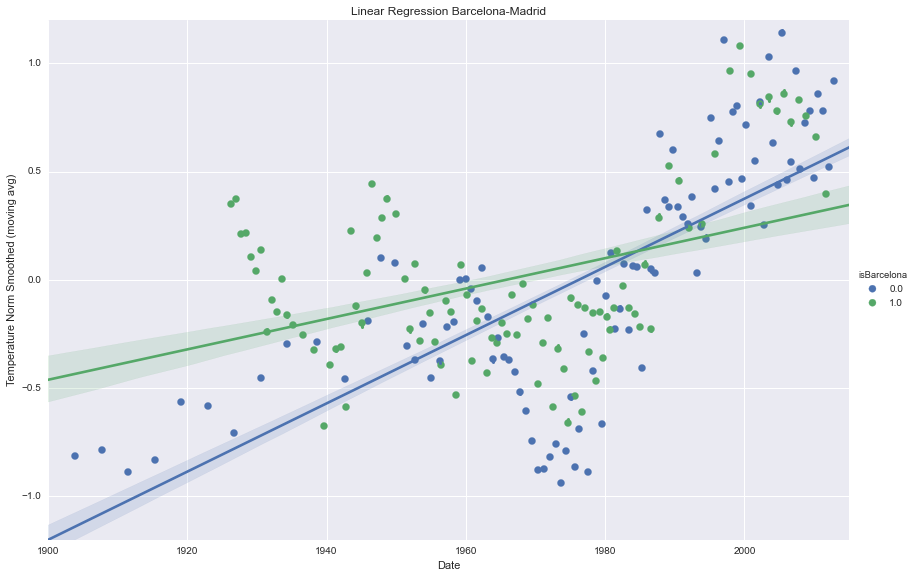

In [20]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])
df_urban['isBarcelona'] = df_urban['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban.isBarcelona = df_urban.isBarcelona.fillna(0)

#x_bins t'agrupa les x del plot perquè quedi més visual / x_ci ajusta l'ombra de la regressió amb l'interval de confiança que dones
lm = sns.lmplot(x="Date", y="Temperature Norm Smoothed (moving avg)", hue="isBarcelona", data=df_urban, size = 8, x_bins = 100, x_ci = 0.95,aspect=1.5).set(xlim=(1900,2015),ylim=(-1.2,1.2),title='Linear Regression Barcelona-Madrid')

A regression with isBarcelona and its interaction with Date is done in order to check the significancy of the difference seen before. The interaction shows that the difference is significant

In [21]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])
df_urban['isBarcelona'] = df_urban['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban.isBarcelona = df_urban.isBarcelona.fillna(0)

X_stats = df_urban['Temperature Norm Smoothed (moving avg)']
Y_stats = df_urban[['Date','isBarcelona']]
Y_stats ['Date*isBarcelona'] = df_urban['Date']*df_urban['isBarcelona']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.183
Model:                                                OLS   Adj. R-squared:                  0.182
Method:                                     Least Squares   F-statistic:                     475.7
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):          5.45e-279
Time:                                            09:08:04   Log-Likelihood:                -7372.0
No. Observations:                                    6391   AIC:                         1.475e+04
Df Residuals:                                        6387   BIC:                         1.478e+04
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Repeating for year > 1970, to analyze the second part of the graph that shows a different trend after the valley:

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\pandas\core\generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


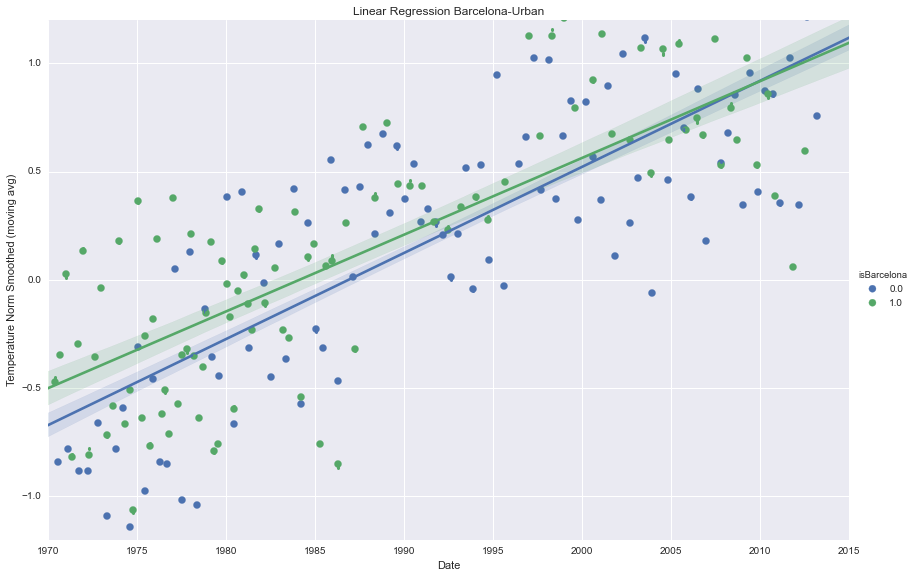

In [23]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])

df_urban70 = df_urban[df_urban.Year>1969]
df_urban70['isBarcelona'] = df_urban70['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban70.isBarcelona = df_urban70.isBarcelona.fillna(0)

#x_bins t'agrupa les x del plot perquè quedi més visual / x_ci ajusta l'ombra de la regressió amb l'interval de confiança que dones
lm = sns.lmplot(x="Date", y="Temperature Norm Smoothed (moving avg)", hue="isBarcelona", data=df_urban70, x_bins = 100, size = 8,  x_ci = 0.95,aspect=1.5).set(xlim=(1970,2015),ylim=(-1.2,1.2),title='Linear Regression Barcelona-Urban')

A regression with isBarcelona and its interaction with Date is done in order to check the significancy of the difference seen before starting on 1970. The interaction shows that the difference is not significant, but it's close to be.

In [24]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])

df_urban70 = df_urban[df_urban.Year>1969]
df_urban70['isBarcelona'] = df_urban70['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban70.isBarcelona = df_urban70.isBarcelona.fillna(0)

X_stats = df_urban70['Temperature Norm Smoothed (moving avg)']
Y_stats = df_urban70[['Date','isBarcelona']]
Y_stats ['Date*isBarcelona'] = df_urban70['Date']*df_urban70['isBarcelona']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.289
Model:                                                OLS   Adj. R-squared:                  0.288
Method:                                     Least Squares   F-statistic:                     512.2
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):          2.40e-279
Time:                                            09:09:14   Log-Likelihood:                -4316.7
No. Observations:                                    3790   AIC:                             8641.
Df Residuals:                                        3786   BIC:                             8666.
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          